In [1]:
import numpy as np
import matplotlib.pyplot as pl

import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.9.12) on 2022-05-11 00:53.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI's XMLRPC API is currently disabled due to unmanageable load and will be deprecated in the near future. See https://status.python.org/ for more information.


In [13]:
scv.settings.set_figure_params('scvelo', dpi_save=200, dpi=80, transparent=True, format='png')
scv.settings.plot_prefix = 'scvelo_dentate_gyrus_dataset_'
scv.settings.verbosity = 2

load in dentate gyrus data included within package

In [3]:
adata = scv.datasets.dentategyrus()

100%|██████████| 23.7M/23.7M [00:00<00:00, 124MB/s]


Preprocess the data and determine tunable parameters. In practice, this is an explorattory process, and highly specific to a given dataset and underlying question. 

Setting the minimum number of cells required to be expressed (both spliced and unspliced transcripts) to 25 and the number of genes to keep to 2500

Computing the moments for velocity estimation. 1st/2nd order moments are computer, for each cell, across its nearest neighbors. The neighbor graph is obtained from euclidean distances in PCA space. Here, the number of neighbors to use is set to 30, and the number of principal components is set to 25. 

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_cells=25, n_top_genes=2500)
scv.pp.moments(adata, n_neighbors=30, n_pcs=25)

Filtered out 12116 genes that are detected in less than 25 cells (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:15)
computing moments based on connectivities
    finished (0:00:00)


Performing velocity analysis in both steady state and stochastic modes

The stochastic mode is a further development from the steady state mode, that treats transcription, splicing, and degradation dynamics as probabilistic events who resulting Markov process is approximated by moment equations. The steady state mode more simply approximates the equilibrium with a linear regression—a key (false) assumption behind this being that there exists a common splicing rate across all genes. 

In [5]:
scv.tl.velocity(adata, vkey='steady_state_velocity', mode='steady_state')
scv.tl.velocity_graph(adata, vkey='steady_state_velocity')

scv.tl.velocity(adata, vkey='stochastic_velocity', mode='stochastic')
scv.tl.velocity_graph(adata, vkey='stochastic_velocity')

computing velocities
    finished (0:00:00)
computing velocity graph (using 1/8 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:04)
computing velocities
    finished (0:00:00)
computing velocity graph (using 1/8 cores)
    finished (0:00:05)


In [6]:
scv.tl.recover_dynamics(adata)


recovering dynamics (using 1/8 cores)
    finished (0:05:14)


In [7]:
scv.tl.velocity(adata, mode='dynamical', vkey='dynamical_velocity')
scv.tl.velocity_graph(adata, vkey='dynamical_velocity', variance_stabilization=True)

computing velocities
    finished (0:00:02)
computing velocity graph (using 1/8 cores)
    finished (0:00:09)


figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_dentate_gyrus_dataset_1.png


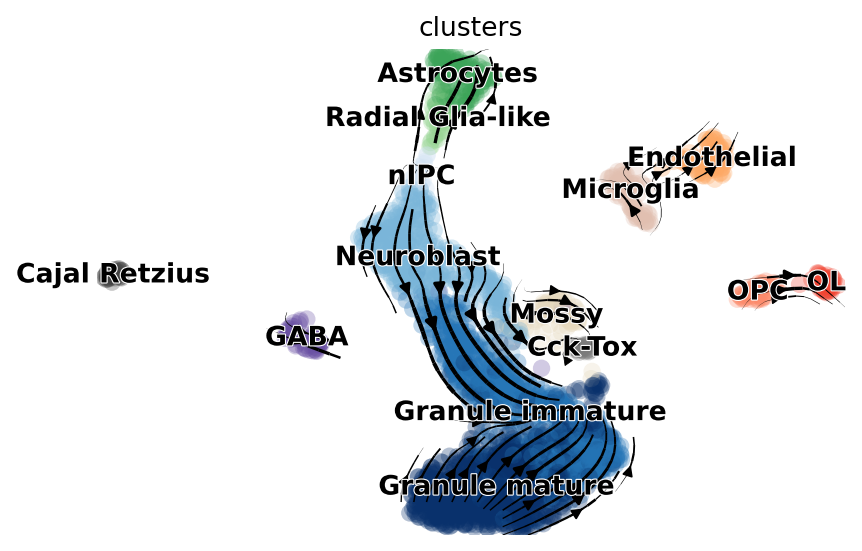

In [10]:
scv.pl.velocity_embedding_stream(adata, vkey='dynamical_velocity', save='1')


saving figure to file ./figures/scvelo_dentate_gyrus_dataset_2.png


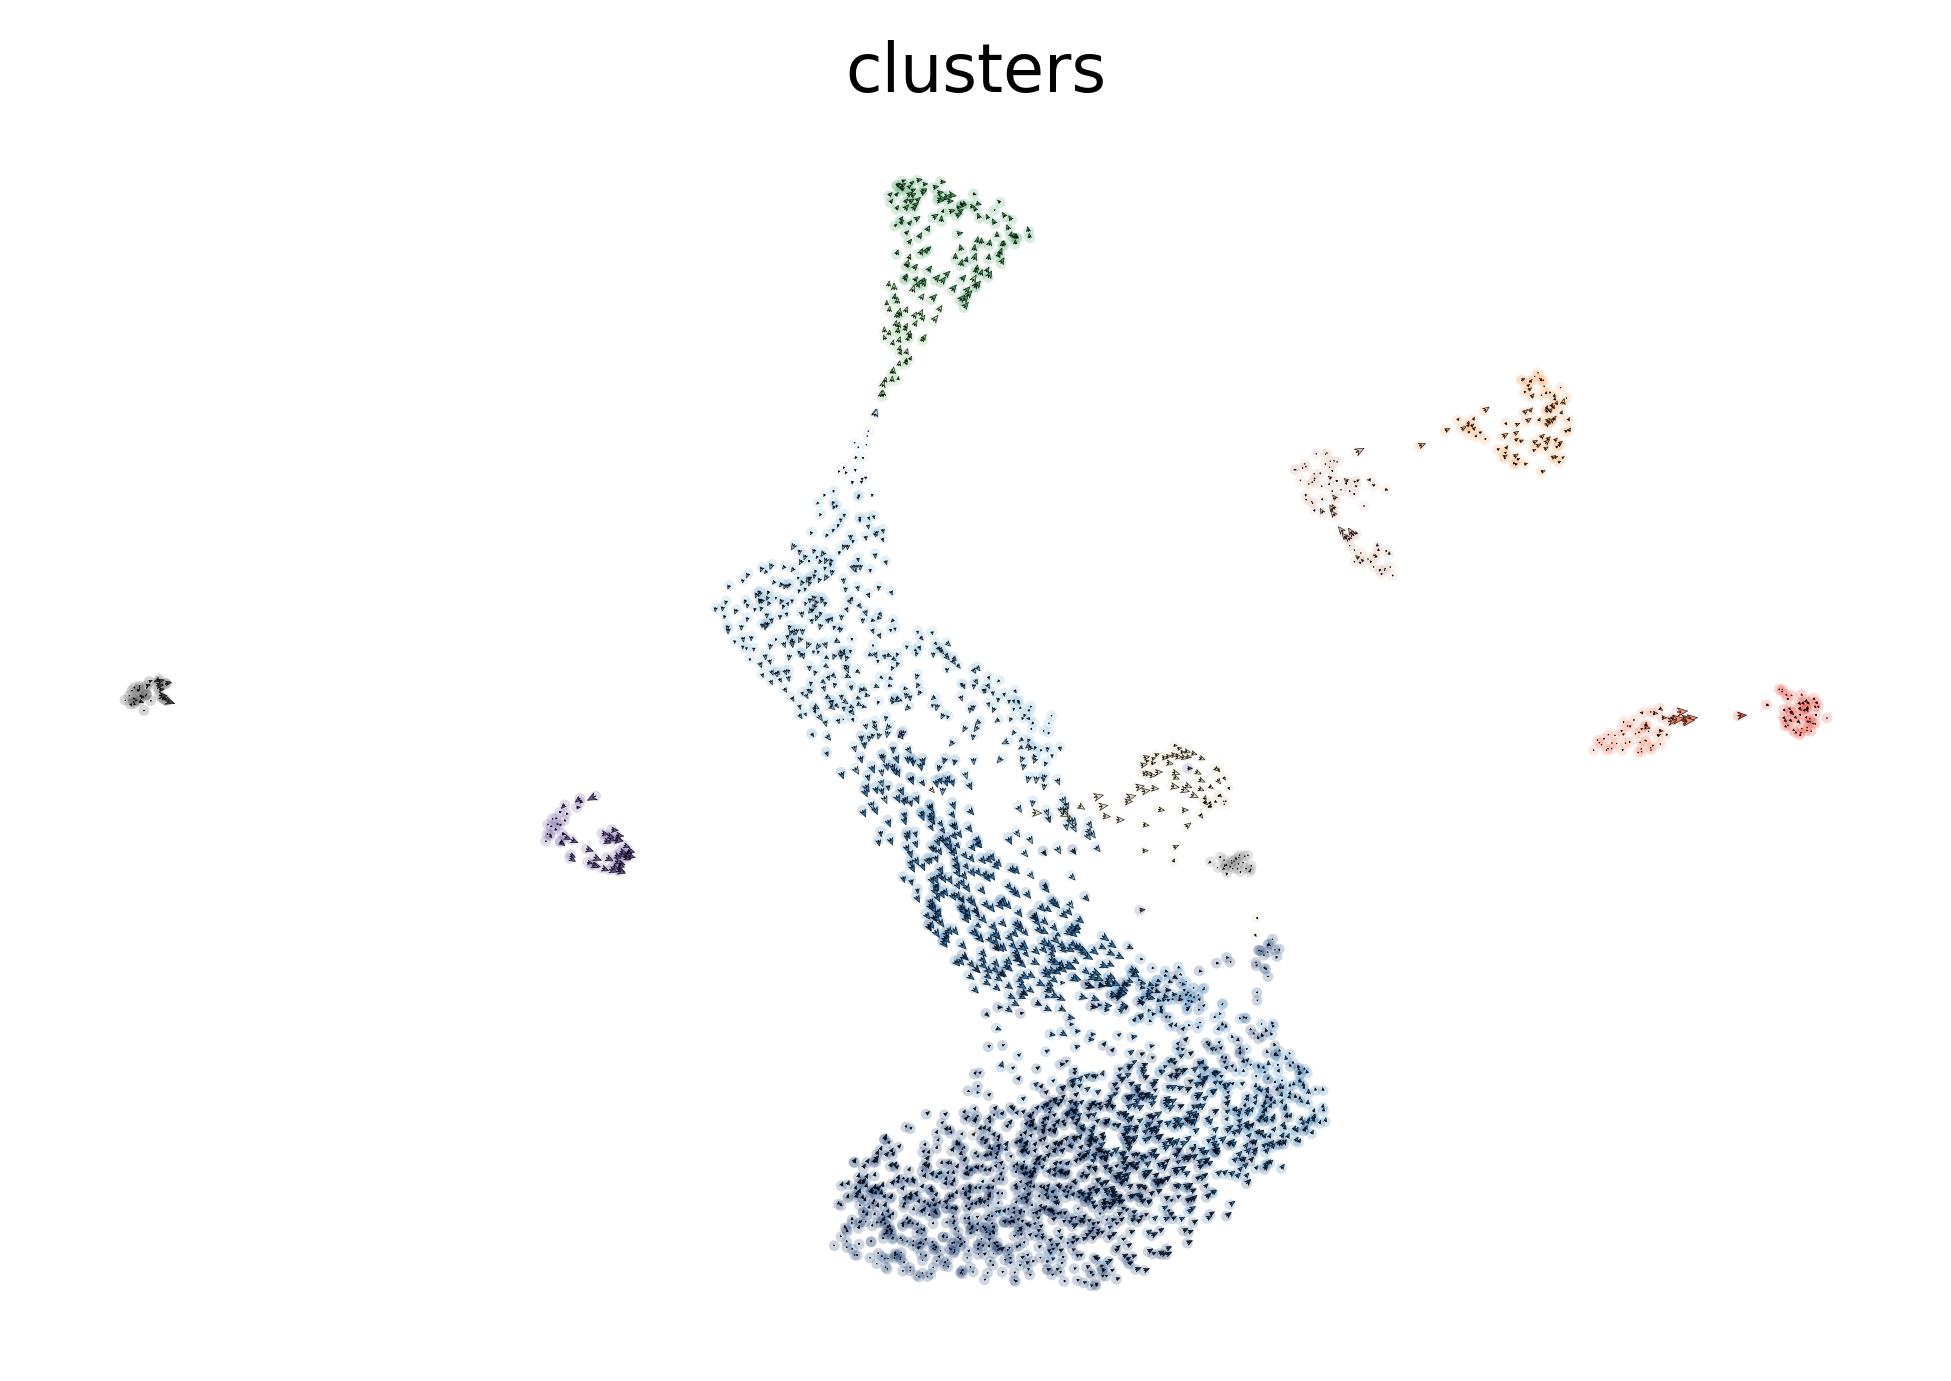

In [14]:
scv.pl.velocity_embedding(adata, vkey='dynamical_velocity', scale=.7, dpi=200, save='2')
